# Landau distribution
Author: Aleksander Filip Żarnecki (University of Warsaw)

### (1) Using root implementation of the function

In [1]:
import math
from ROOT import *
import numpy as np

# For inline image display
from IPython.display import Image

Welcome to JupyROOT 6.24/04


In [2]:
# Set ROOT graphics options

gROOT.SetStyle("Plain")

# Default canvas  size

gStyle.SetCanvasDefW(800)
gStyle.SetCanvasDefH(700)
 
# set the margins
  
gStyle.SetPadBottomMargin(0.18)
gStyle.SetPadTopMargin(0.08)
gStyle.SetPadRightMargin(0.08)
gStyle.SetPadLeftMargin(0.17)

# set the number of divisions to show

gStyle.SetNdivisions(510, "xy")

# show grid

gStyle.SetPadGridX(1)
gStyle.SetPadGridY(1)

# border ploted only around statistics

gStyle.SetPadBorderMode(0)
gStyle.SetFrameBorderMode(0)
gStyle.SetLegendBorderSize(0)
gStyle.SetTitleBorderSize(0)
gStyle.SetStatBorderSize(1)

# Text sizes

gStyle.SetTextSize(0.05)
gStyle.SetTitleSize(0.06,"xyz")
gStyle.SetLabelSize(0.05,"xyz")

gStyle.SetLabelOffset(0.015,"xyz")
gStyle.SetTitleOffset(1.2,"yz")
gStyle.SetTitleOffset(1.0,"x")

# Font settings

font = 42
gStyle.SetTitleFont(font)
gStyle.SetTitleFontSize(0.05)
gStyle.SetStatFont(font)
gStyle.SetStatFontSize(0.06)
gStyle.SetTextFont(font)
gStyle.SetLabelFont(font,"xyz")
gStyle.SetTitleFont(font,"xyz")
gStyle.SetLegendFont(font)

# Line settings

gStyle.SetHistLineWidth(2)
gStyle.SetFrameLineWidth(2)
gStyle.SetFuncWidth(2)
gStyle.SetHistLineColor(kBlue)
gStyle.SetFuncColor(kRed)

# Log scale
gStyle.SetOptLogy(0)

# Histogram title
gStyle.SetOptTitle(1)  

# Histogram statistics
gStyle.SetOptStat(1100)

# Fit results
gStyle.SetOptFit(0) 


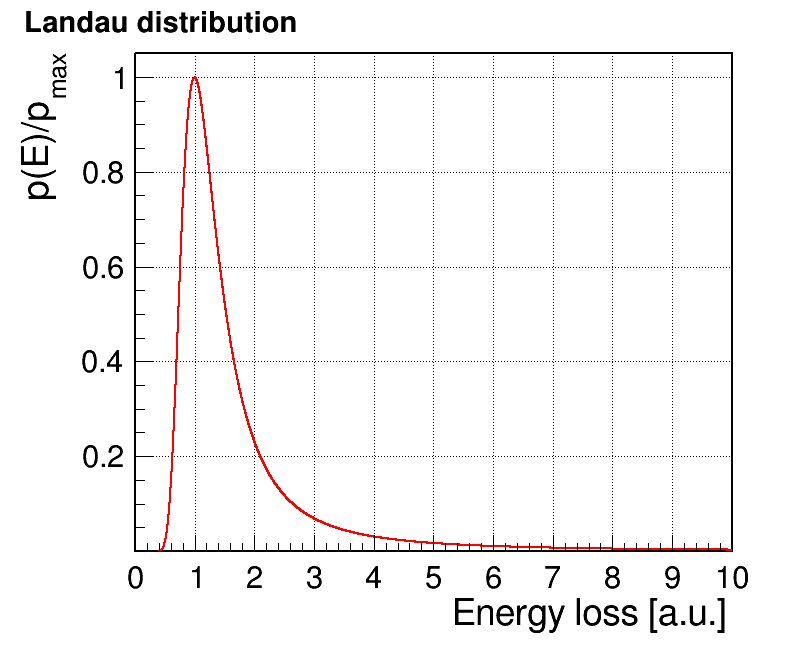

Info in <TCanvas::Print>: png file Landau.png has been created


In [3]:
# My interface to the Landau distribution from ROOT

def myLan(x, par):
    return par[0]*TMath.Landau(x[0],par[1],par[2])


# Define root function
# Parameters chosen to get "standard" shape: maximum at 1.0 with height of 1.0

flan=TF1("flan",myLan,0.,10.,3)
flan.SetParameter(0,5.5353933)
flan.SetParameter(1,1.04456)
flan.SetParameter(2,0.2)
flan.SetTitle("Landau distribution")

# Display function

cLan=TCanvas('cLan')
flan.SetNpx(10000)
flan.SetMinimum(1E-3)
flan.GetXaxis().SetTitle("Energy loss [a.u.]")
flan.GetYaxis().SetTitle("p(E)/p_{max}")
flan.Draw()

cLan.Update()
cLan.Print('Landau.png')

Image(filename='Landau.png')

In [4]:
# Check mean and rms of the plotted function

print('Average value from histogram: ',flan.GetHistogram().GetMean())
print('RMS value from histogram:     ',flan.GetHistogram().GetRMS())

Average value from histogram:  1.7005283597572596
RMS value from histogram:      1.263773555459338



### 

### (2) Generating rantom numbers from Landau distribution


In [5]:
# My interface to the integrated Landau distribution from ROOT
# (taking into account shift and scaling defined above)

def myLanI(x):
    return TMath.LandauI(5.0*(x-1.04456))

# Procedure for generation random number from Landau distribution

# gRandom.SetSeed(2018)

prec=0.001

def LanRnd():
    oldval = 0.    
    oldx=0.
    step=1.
    val = gRandom.Uniform(1.)
#    print('Target val: ',val)
    
    while step>prec:
        newx=oldx+step
        newval=myLanI(newx)
#        print('Step = ',step,'  x = ',newx,' val = ',newval)

        if newval < val:
            oldx=newx
            oldval=newval
            step=2.0*step
        else:
            step=0.5*step
     
#    print('Found value of x = ',oldx,' corresponding to val = ',myLanI(oldx))
    return oldx


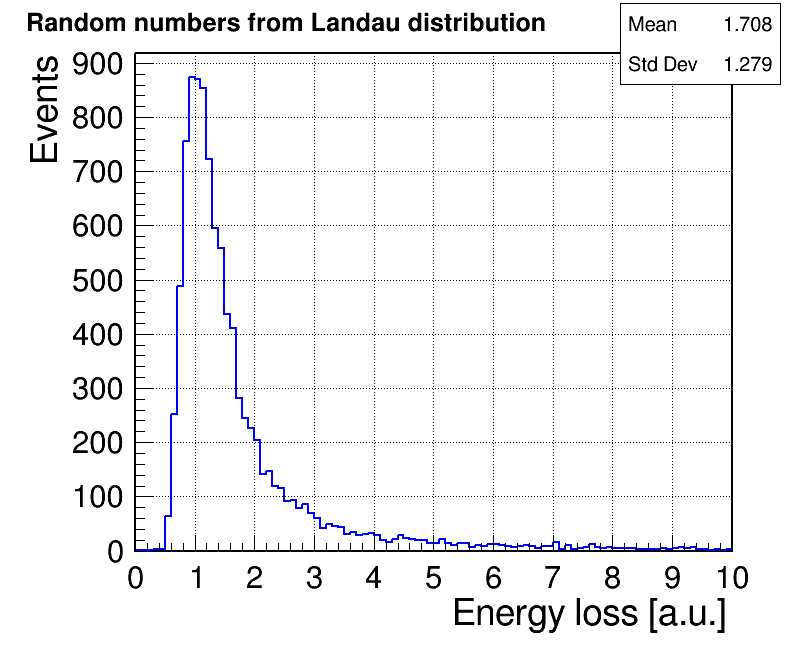

Info in <TCanvas::Print>: png file Landau2.png has been created


In [6]:
# Define histogram and fill it with generated numbers

ngen = 10000

data = []
data.clear()

hLan = TH1D('hLan','Random numbers from Landau distribution',100, 0., 10.)
hLan.SetStats(1)
hLan.GetXaxis().SetTitle("Energy loss [a.u.]")
hLan.GetYaxis().SetTitle("Events")

for i in  range(ngen):
    lx=LanRnd()
    data.append(lx)
    hLan.Fill(lx)

cLan2 = TCanvas('cLan2')

hLan.DrawCopy()

cLan2.Update()
cLan2.Print('Landau2.png')

Image(filename='Landau2.png')

In [7]:
# Give mean and rms of the plotted function again (same as before, for reference)

print('Average value from PDF histogram: ',flan.GetHistogram().GetMean())
print('RMS value from PDF histogram :    ',flan.GetHistogram().GetRMS())
print('')

# Check mean and rms of generated data from histogram (!)

print(ngen,'random data generated from Landau PDF')
print('Average value from data histogram: ',hLan.GetMean())
print('RMS value from data histogram:     ',hLan.GetRMS())

print('')
print('Relative histogram width:     ',hLan.GetRMS()/hLan.GetMean())


Average value from PDF histogram:  1.7005283597572596
RMS value from PDF histogram :     1.263773555459338

10000 random data generated from Landau PDF
Average value from data histogram:  1.707672936659653
RMS value from data histogram:      1.2788273473926004

Relative histogram width:      0.7488713558312229


In [8]:
# Check mean and RMS of generated data

print('Maximum generated value:     ',np.nanmax(data))
print('Average value from all data: ',np.mean(data))
print('RMS value from all data:     ',np.std(data))


Maximum generated value:      9609.931640625
Average value from all data:  4.8056830078125
RMS value from all data:      125.08399758919697



###

### (3) Undertanding properties of the Landau distribution


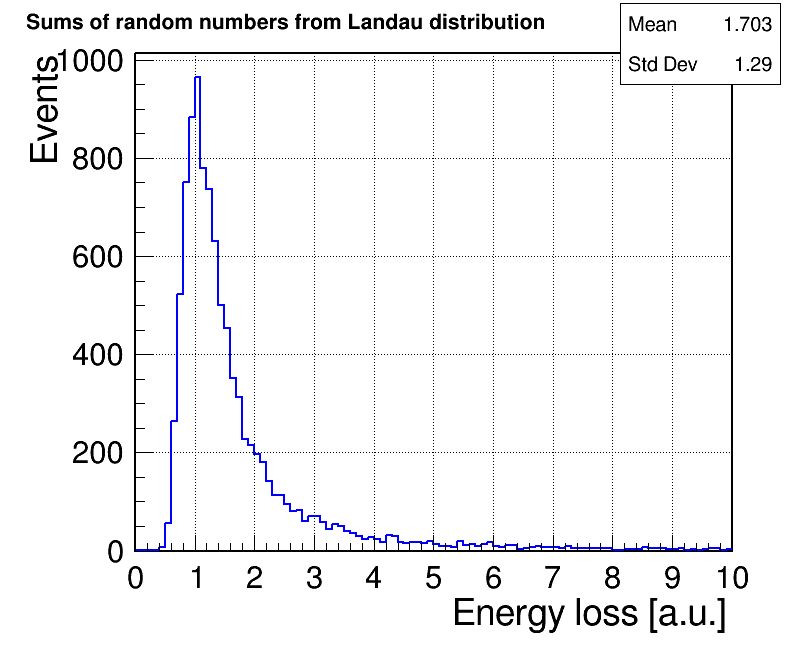

Info in <TCanvas::Print>: png file Landau3.png has been created


In [9]:
# Define histogram and filling with sums of Nsum numbers generated from Landau distribution

# nsum = 1 reproduces results from Part II (single random number)
# Change to higher value (eg. 9, 25, 100) for sum of nsum Landau distributed numbers

nsum = 1
ngen = 10000

sums = []
sums.clear()

# To get similar coverage for different nsum

xmax = 10.*nsum*(1+log(1.0*nsum)/log(100.))

hLan2 = TH1D('hLan2','Sums of random numbers from Landau distribution',100, 0., xmax)
hLan2.SetStats(1)
hLan2.GetXaxis().SetTitle("Energy loss [a.u.]")
hLan2.GetYaxis().SetTitle("Events")

for i in  range(ngen):
    lx=0
    for j in range(nsum):
        lx=lx+LanRnd()
    sums.append(lx)
    hLan2.Fill(lx)

cLan3 = TCanvas('cLan3')

hLan2.DrawCopy()

cLan3.Update()
cLan3.Print('Landau3.png')

Image(filename='Landau3.png')

In [10]:
# Check mean and RMS of generated data

print(ngen,'sums of',nsum,'numbers from Landau PDF generated')
print('Average value from sum histogram: ',hLan2.GetMean())
print('RMS value from sum histogram:     ',hLan2.GetRMS())
print('')
print('Relative histogram width:     ',hLan2.GetRMS()/hLan2.GetMean())
print('')
print('Maximum generated value:          ',np.nanmax(sums))
print('Average value from all sums:      ',np.mean(sums))
print('RMS value from all sums:          ',np.std(sums))

10000 sums of 1 numbers from Landau PDF generated
Average value from sum histogram:  1.7031140094255166
RMS value from sum histogram:      1.2896068875822695

Relative histogram width:      0.7572052607430969

Maximum generated value:           6578.412109375
Average value from all sums:       3.051387890625
RMS value from all sums:           66.63910027143102
